# Import

In [2]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import StackingRegressor
from tensorflow import keras
from keras import layers

# Tiền xử lí

1. Đọc dữ liệu

In [3]:
df = pd.read_csv("seattle-weather.csv")
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,01/01/2012,0.0,12.8,5.0,4.7,drizzle
1,02/01/2012,10.9,10.6,2.8,4.5,rain
2,03/01/2012,0.8,11.7,7.2,2.3,rain
3,04/01/2012,20.3,12.2,5.6,4.7,rain
4,05/01/2012,1.3,8.9,2.8,6.1,rain


2. Bỏ cột Date do dữ liệu ko cần thiết

In [4]:
df.drop(columns=['date'], inplace=True)

3. Chuyển đổi giá trị từ chuỗi sang số

In [5]:
mapping = {'drizzle': 0, 'fog': 1, 'rain': 2, 'snow': 3, 'sun': 4}

df['weather'] = df['weather'].map(mapping)
print(df)

      precipitation  temp_max  temp_min  wind  weather
0               0.0      12.8       5.0   4.7        0
1              10.9      10.6       2.8   4.5        2
2               0.8      11.7       7.2   2.3        2
3              20.3      12.2       5.6   4.7        2
4               1.3       8.9       2.8   6.1        2
...             ...       ...       ...   ...      ...
1456            8.6       4.4       1.7   2.9        2
1457            1.5       5.0       1.7   1.3        2
1458            0.0       7.2       0.6   2.6        1
1459            0.0       5.6      -1.0   3.4        4
1460            0.0       5.6      -2.1   3.5        4

[1461 rows x 5 columns]


4. Chia dữ liệu thành train and test

In [6]:
X = df[['precipitation', 'temp_max', 'temp_min', 'wind']]
y = df['weather']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5. Chuẩn hoá dữ liệu

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models

1. Hồi quy tuyến tính

In [8]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression - MSE: {mse_linear:.4f}, R2: {r2_linear:.4f}")

Linear Regression - MSE: 1.0721, R2: 0.2469


2. Hồi quy Lasso

In [9]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Regression - MSE: {mse_lasso:.4f}, R2: {r2_lasso:.4f}")

Lasso Regression - MSE: 1.1977, R2: 0.1587


3. Neural network

In [10]:
model_Neural_Net = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(5, activation='softmax')
])

model_Neural_Net.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model_Neural_Net.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5670 - loss: 1.3232 - val_accuracy: 0.6667 - val_loss: 0.9853
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7195 - loss: 0.9462 - val_accuracy: 0.7350 - val_loss: 0.8380
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7366 - loss: 0.8472 - val_accuracy: 0.7778 - val_loss: 0.7681
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7531 - loss: 0.7937 - val_accuracy: 0.7778 - val_loss: 0.7141
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7450 - loss: 0.7266 - val_accuracy: 0.7863 - val_loss: 0.6813
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7685 - loss: 0.6657 - val_accuracy: 0.7949 - val_loss: 0.6577
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7753 - loss: 0.6699 - val_accuracy: 0.7692 - val_loss: 0.6552
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7763 - loss: 0.6523 - val_accuracy: 0.7863 - val_loss:

In [11]:
test_loss, test_accuracy = model_Neural_Net.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8010 - loss: 0.5412 
Test Loss: 0.5306249856948853
Test Accuracy: 0.80887371301651


4. Bagging

In [17]:
bagging_lr = BaggingRegressor(estimator=LinearRegression(), n_estimators=10, random_state=42)
bagging_lr.fit(X_train, y_train)
y_pred_bagging_lr = bagging_lr.predict(X_test)

print("Bagging MSE:", mean_squared_error(y_test, y_pred_bagging_lr))
print("Bagging R²:", r2_score(y_test, y_pred_bagging_lr))

Bagging MSE: 1.0702309521578144
Bagging R²: 0.24825513817872513


5. Stacking

In [16]:
# Tạo các mô hình cho stacking
estimators = [
    ('lr', LinearRegression()),
    ('lasso', Lasso())
]

stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacking_model.fit(X_train, y_train)
y_pred_stacking = stacking_model.predict(X_test)

print("Stacking Model MSE:", mean_squared_error(y_test, y_pred_stacking))
print("Stacking Model R²:", r2_score(y_test, y_pred_stacking))

Stacking Model MSE: 1.0738178882941931
Stacking Model R²: 0.24573562516635428


# Tổng kết

In [24]:
# Đánh giá Hồi quy tuyến tính
print(f"Linear Regression - MSE: {mse_linear:.4f}, R2: {r2_linear:.4f}\n")

# Đánh giá Hồi quy Lasso
print(f"Lasso Regression - MSE: {mse_lasso:.4f}, R2: {r2_lasso:.4f}\n")

# Đánh giá Neural Network
test_loss, test_accuracy = model_Neural_Net.evaluate(X_test, y_test)
print(f'NN Loss: {test_loss}')
print(f'NN Accuracy: {test_accuracy}\n')

# Đánh giá Bagging Linear Regression
print("Bagging MSE:", mean_squared_error(y_test, y_pred_bagging_lr))
print("Bagging R²:", r2_score(y_test, y_pred_bagging_lr))

# Đánh giá mô hình Stacking
print("Stacking Model MSE:", mean_squared_error(y_test, y_pred_stacking))
print("Stacking Model R²:", r2_score(y_test, y_pred_stacking))

Linear Regression - MSE: 1.0721, R2: 0.2469

Lasso Regression - MSE: 1.1977, R2: 0.1587

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8010 - loss: 0.5412 
NN Loss: 0.5306249856948853
NN Accuracy: 0.80887371301651

Bagging MSE: 1.0702309521578144
Bagging R²: 0.24825513817872513
Stacking Model MSE: 1.0738178882941931
Stacking Model R²: 0.24573562516635428


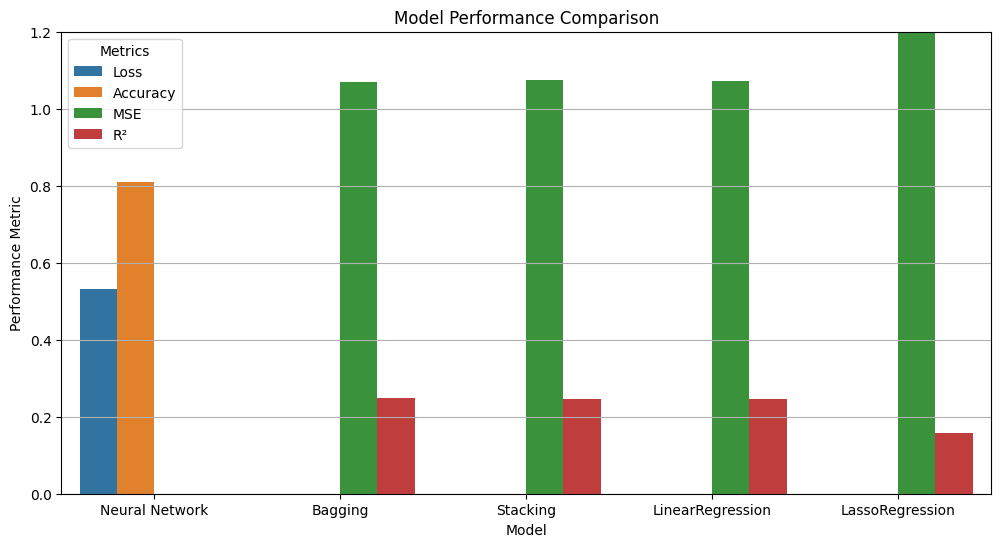

In [25]:
# Metrics
models = ['Neural Network', 'Bagging', 'Stacking', 'LinearRegression', 'LassoRegression']
loss = [0.5306249856948853, None, None, None, None]  # Only NN has loss
accuracy = [0.80887371301651, None, None, None, None]  # Only NN has accuracy
mse = [None, 1.0702309521578144, 1.0738178882941931, 1.0721, 1.1977]  # MSE for Bagging and Stacking
r2 = [None, 0.24825513817872513, 0.24573562516635428, 0.2469, 0.1587]  # R² for Bagging and Stacking

metrics = pd.DataFrame({
    'Model': models,
    'Loss': loss,
    'Accuracy': accuracy,
    'MSE': mse,
    'R²': r2
})

# Melt the DataFrame to long format for easier plotting
metrics_melted = metrics.melt(id_vars='Model', value_vars=['Loss', 'Accuracy', 'MSE', 'R²'])

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='value', hue='variable', data=metrics_melted)

# Customize the plot
plt.title('Model Performance Comparison')
plt.ylabel('Performance Metric')
plt.xlabel('Model')
plt.ylim(0, 1.2)
plt.legend(title='Metrics')
plt.grid(axis='y')
plt.show()